# Descriptive Statistics

Statistik Deskriptif adalah salah satu metode yang digunakan untuk memahami dan meringkas data. Tujuannya yaitu untuk memberikan gambaran yang lebih jelas tenatang identifikasi pola, tren dan karakteristik dari kumpulan data.

## Import Library & Dataset

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew


In [2]:
#import Dataset
data = pd.read_csv('Online_Retail.csv', encoding='latin1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


## Pra-Pemrosesan Data

## Duplicated Value

Proses pengecekan data duplikat juga perlu dilakukan sebelum melakukan analisa, hal tersebut dapat memberikan dampak yang signifikan terhadap hasil analisa jika tidak diselesaikan terlebih dahulu.

In [3]:
duplicated = data.duplicated().sum()
total_data = len(data)
duplicated_data = duplicated / total_data * 100

print('Data duplicated : {:,}'.format(duplicated))
print('% Data duplicated : {:.1f} %'.format(duplicated_data))

Data duplicated : 5,268
% Data duplicated : 1.0 %


Terdapat 5,268 data yang duplikat atau sekitar 1% dari total data, kami memutuskan untuk menghapus duplikat data tersebut.

In [4]:
data = data.drop_duplicates()
data.duplicated().sum()

0

## Numerical Column

Tahap berikutnya yaitu menentukan kolom mana yang akan dilakukan analisa. Untuk tahapan analisa kali ini akan berfokus ke kolom dengan tipe data numerical. Untuk menentukan mana yang termasuk dalam kolom numerical dapat menggunakan fungsi ini :

In [5]:
data.select_dtypes(include=['int64','float64','Int64']).dtypes

Quantity        int64
UnitPrice     float64
CustomerID    float64
dtype: object

Terdapat tiga kolom numerical, namun kita akan fokus untuk menganalisa kolom Quantity dan UnitPrice. Melakukan pengecekan terhadap nilai Quantity dan UnitPrice yang memilik nilai 0 dan minus. Dalam Case ini kami mengasumsikan bahwa tidak ada transaksi dengan nilai 0 dan minus baik nilai Quantity dan UnitPrice.

In [6]:
column = ['Quantity', 'UnitPrice']

for i in column:
    zero = (data[i] < 1).sum()
    one = zero / data[i].count() * 100
    print('Nilai {} < 1 : {}'.format(i, zero))
    print('Nilai {} < 1 : {:.1f} %'.format(i, one))
    print()

Nilai Quantity < 1 : 10587
Nilai Quantity < 1 : 2.0 %

Nilai UnitPrice < 1 : 113351
Nilai UnitPrice < 1 : 21.1 %



Berdasarkan pengecekan nilai dengan value nol dan minus terdapat 2% data pada Quantity dan 21.2% pada nilai UnitPrice. Untuk melakukan proses filter tersebut dapat menggunakan metode dibawah :

In [7]:
data_clean = data[(data['Quantity'] >= 1) & (data['UnitPrice'] >= 1)]

difference = data.shape[0] - data_clean.shape[0]
differences = difference / data.shape[0] * 100

print('Data sebelum cleansing : {}'.format(data.shape))
print('Data setelah cleansing : {}'.format(data_clean.shape))
print('Selisih data : {}'.format(difference))
print('% Selisih data : {:.1f} %'.format(differences))

Data sebelum cleansing : (536641, 8)
Data setelah cleansing : (415294, 8)
Selisih data : 121347
% Selisih data : 22.6 %


Total data yang terhapus sekitar 22.6% dari total data 541.909 , Data ini-lah yang akan kita gunakan untuk proses selanjutnya. 

In [8]:
column = ['Quantity', 'UnitPrice']

for i in column:
    zero = (data_clean[i] < 1).sum()
    one = zero / data_clean[i].count() * 100
    print('Nilai {} < 1 : {}'.format(i, zero))
    print('Nilai {} < 1 : {:.1f} %'.format(i, one))
    print()

Nilai Quantity < 1 : 0
Nilai Quantity < 1 : 0.0 %

Nilai UnitPrice < 1 : 0
Nilai UnitPrice < 1 : 0.0 %



Setelah pengecekan kembali, kita ditemukan lagi nilai Quantity dan UnitPrice yang nilainya 0 atau  lebih kecil dari 1.

## Pengecekan Outlier

Outlier dapat membiaskan hasil analisa, untuk itu perlu dilakukan pengecekan outlier pada dataset. Berikut metode yang kami lakukan untuk melakukan pengecekan outlier :

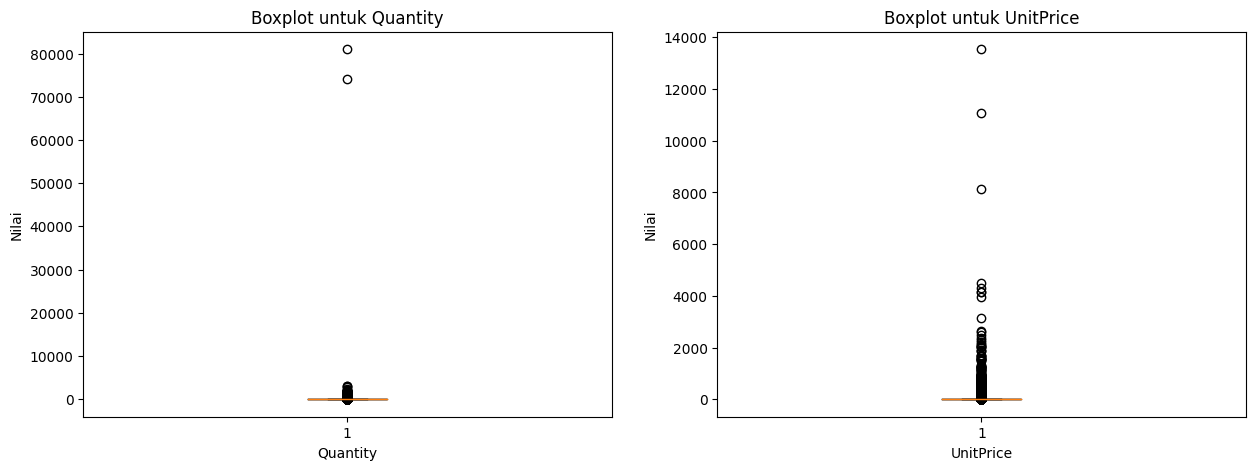

In [9]:
# Kolom yang akan diplot
columns_to_plot = ['Quantity', 'UnitPrice']

# Membuat subplot dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Melakukan iterasi untuk membuat boxplot untuk setiap kolom
for i, col in enumerate(columns_to_plot):
    axes[i].boxplot(data_clean[col])
    
    # Menambahkan label dan judul
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Nilai')
    axes[i].set_title(f'Boxplot untuk {col}')

# Menampilkan subplot
plt.show()

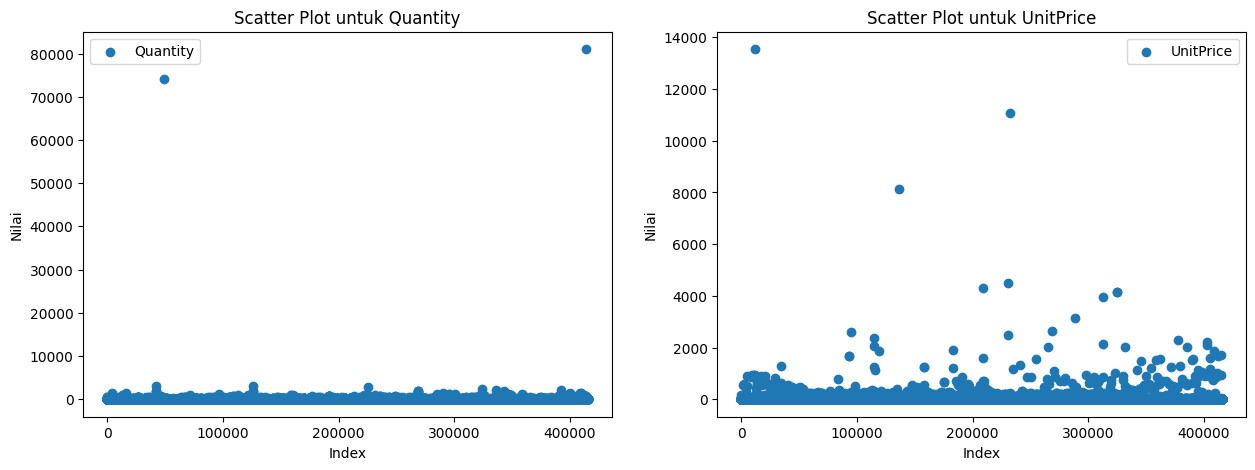

In [10]:
# Kolom yang akan diplot
columns_to_plot = ['Quantity', 'UnitPrice']

# Membuat subplot dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Melakukan iterasi untuk membuat scatter plot untuk setiap kolom
for i, col in enumerate(columns_to_plot):
    axes[i].scatter(range(len(data_clean[col])), data_clean[col], marker='o', label=col)
    
    # Menambahkan label dan judul
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Nilai')
    axes[i].set_title(f'Scatter Plot untuk {col}')
    axes[i].legend()

# Menampilkan subplot
plt.show()

Melalui pengamatan grafik boxplot dan scatter plot, terdapat outlier yang cukup signifikan. Kita perlu melakukan pengecekan seberapa banyak outlier tersebut.

In [11]:
columns = ['Quantity','UnitPrice']
outlier_percentage = {}

for column in columns:
    column_data = data_clean[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = column_data[(column_data < lower) | (column_data > upper)]
    outlier_percentage[column] = len(outliers) / len(column_data) * 100

# Display the outlier percentage for each column
for column, percentage in outlier_percentage.items():
    print(f"Count of outliers in column '{column}': {len(outliers)}")
    print(f"Percentage of outliers in column '{column}': {percentage:.2f}%")
    print()

Count of outliers in column 'Quantity': 29994
Percentage of outliers in column 'Quantity': 7.05%

Count of outliers in column 'UnitPrice': 29994
Percentage of outliers in column 'UnitPrice': 7.22%



In [12]:
#data_cleans = data_clean.copy()
#data_cleans = data_cleans.loc[(data_cleans['Quantity'] >= lower) & (data_cleans['Quantity'] <= upper)]

In [13]:
#data_cleans = data_clean.copy()

# Filter data untuk menghilangkan outlier
#data_cleans = data_cleans.loc[(data_cleans['Quantity'] >= lower) & (data_cleans['Quantity'] <= upper)]

# Cek apakah masih ada outlier
#while len(data_cleans[(data_cleans['Quantity'] < lower) | (data_cleans['Quantity'] > upper)]) > 0:
    # Filter data kembali jika masih terdapat outlier
#    data_cleans = data_cleans.loc[(data_cleans['Quantity'] >= lower) & (data_cleans['Quantity'] <= upper)]

# Data cleans sekarang tidak memiliki outlier


In [14]:
# List kolom yang akan diiterasi
columns_to_check = ['Quantity', 'UnitPrice']

data_cleans = data_clean.copy()

# Loop untuk setiap kolom
for column in columns_to_check:
    while len(data_cleans[(data_cleans[column] < lower) | (data_cleans[column] > upper)]) > 0:
        # Filter data kembali jika masih terdapat outlier pada kolom tertentu
        data_cleans = data_cleans.loc[(data_cleans[column] >= lower) & (data_cleans[column] <= upper)]

# Data cleans sekarang tidak memiliki outlier pada kedua kolom Quantity maupun UnitPrice


In [15]:
columns = ['Quantity', 'UnitPrice']
outlier_percentage = {}

for column in columns:
    column_data = data_cleans[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = column_data[(column_data < lower) | (column_data > upper)]
    outlier_percentage[column] = len(outliers) / len(column_data) * 100

# Display the outlier percentage for each column
for column, percentage in outlier_percentage.items():
    print(f"Count of outliers in column '{column}': {len(outliers)}")
    print(f"Percentage of outliers in column '{column}': {percentage:.2f}%")
    print()

Count of outliers in column 'Quantity': 1192
Percentage of outliers in column 'Quantity': 0.51%

Count of outliers in column 'UnitPrice': 1192
Percentage of outliers in column 'UnitPrice': 0.41%



In [18]:
# List kolom yang akan diiterasi
columns_to_check = ['Quantity', 'UnitPrice']

# Loop untuk setiap kolom
for column in columns_to_check:
    while len(data_cleans[(data_cleans[column] < lower) | (data_cleans[column] > upper)]) > 0:
        # Filter data kembali jika masih terdapat outlier pada kolom tertentu
        data_cleans = data_cleans.loc[(data_cleans[column] >= lower) & (data_cleans[column] <= upper)]

# Data cleans sekarang tidak memiliki outlier pada kedua kolom Quantity maupun UnitPrice


In [19]:
columns = ['Quantity', 'UnitPrice']
outlier_percentage = {}

for column in columns:
    column_data = data_cleans[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = column_data[(column_data < lower) | (column_data > upper)]
    outlier_percentage[column] = len(outliers) / len(column_data) * 100

# Display the outlier percentage for each column
for column, percentage in outlier_percentage.items():
    print(f"Count of outliers in column '{column}': {len(outliers)}")
    print(f"Percentage of outliers in column '{column}': {percentage:.2f}%")
    print()

Count of outliers in column 'Quantity': 0
Percentage of outliers in column 'Quantity': 0.00%

Count of outliers in column 'UnitPrice': 0
Percentage of outliers in column 'UnitPrice': 0.00%



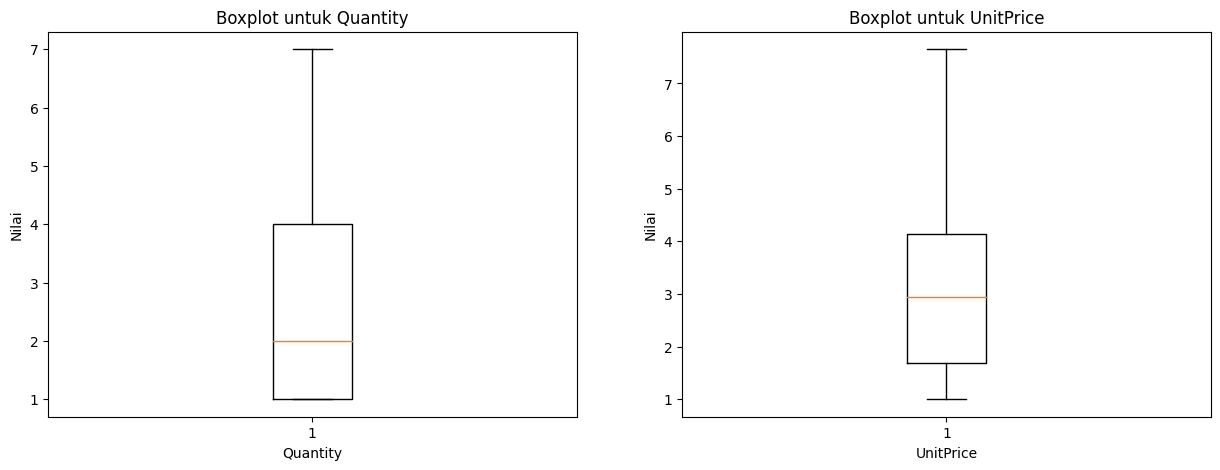

In [20]:
# Kolom yang akan diplot
columns_to_plot = ['Quantity', 'UnitPrice']

# Membuat subplot dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Melakukan iterasi untuk membuat boxplot untuk setiap kolom
for i, col in enumerate(columns_to_plot):
    axes[i].boxplot(data_cleans[col])
    
    # Menambahkan label dan judul
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Nilai')
    axes[i].set_title(f'Boxplot untuk {col}')

# Menampilkan subplot
plt.show()

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


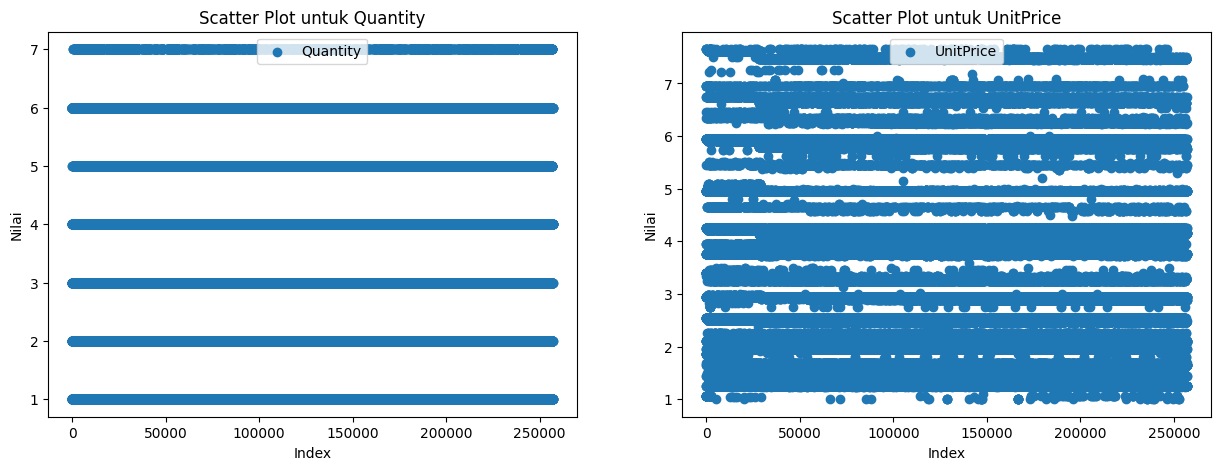

In [21]:
# Kolom yang akan diplot
columns_to_plot = ['Quantity', 'UnitPrice']

# Membuat subplot dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Melakukan iterasi untuk membuat scatter plot untuk setiap kolom
for i, col in enumerate(columns_to_plot):
    axes[i].scatter(range(len(data_cleans[col])), data_cleans[col], marker='o', label=col)
    
    # Menambahkan label dan judul
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Nilai')
    axes[i].set_title(f'Scatter Plot untuk {col}')
    axes[i].legend()

# Menampilkan subplot
plt.show()

## 1. Measures of Central Tendency

In [22]:
column = ['Quantity', 'UnitPrice']

for i in column:
    mean_value = data_cleans[i].mean()
    median_value = data_cleans[i].median()
    mode_value = data_cleans[i].mode().iloc[0]  # Mengambil nilai modus pertama (bisa ada lebih dari satu modus)
    
    print('Mean of {} : {:.2f}'.format(i, mean_value))
    print('Median of {} : {:.2f}'.format(i, median_value))
    print('Mode of {} : {:.2f}'.format(i, mode_value))
    print()

Mean of Quantity : 2.63
Median of Quantity : 2.00
Mode of Quantity : 1.00

Mean of UnitPrice : 3.16
Median of UnitPrice : 2.95
Mode of UnitPrice : 1.25



Asumsi Awal :

1. Rata-rata Quantity adalah 2.63, artinya jika kita menjumlahkan semua nilai Quantity dan membaginya dengan jumlah observasi, kita akan mendapatkan nilai tersebut. Begitu juga untuk UnitPrice, rata-ratanya adalah 3.16.

2. Median Quantity adalah 2.00, yang berarti jika kita menyusun semua nilai Quantity secara berurutan, nilai tengahnya adalah 2.00. Untuk UnitPrice, median adalah 2.95.

3. Modus Quantity adalah 1.00, yang merupakan nilai yang paling sering muncul dalam dataset Quantity. Untuk UnitPrice, modusnya adalah 1.25.

## 2. Measures of Dispersion

Pada proses ini kami melakukan analisa dengan menentukan nilai Man, Q1, Q2, Q3, Max, dan nilai IQR.

In [23]:
column = ['Quantity', 'UnitPrice']

for i in column:
    min = data_cleans[i].min()
    q1 = data_cleans[i].quantile(0.25)
    q2 = data_cleans[i].quantile(0.5)
    q3 = data_cleans[i].quantile(0.75)
    max = data_cleans[i].max()
    iqr = q3 - q1
    
    print('Min of {} : {:.2f}'.format(i, min))
    print('Q1 of {} : {:.2f}'.format(i, q1))
    print('Q2 of {} : {:.2f}'.format(i, q2))
    print('Q3 of {} : {:.2f}'.format(i, q3))
    print('Max of {} : {:.2f}'.format(i, max))
    print('IQR of {} : {:.2f}'.format(i, iqr))
    print()


Min of Quantity : 1.00
Q1 of Quantity : 1.00
Q2 of Quantity : 2.00
Q3 of Quantity : 4.00
Max of Quantity : 7.00
IQR of Quantity : 3.00

Min of UnitPrice : 1.00
Q1 of UnitPrice : 1.69
Q2 of UnitPrice : 2.95
Q3 of UnitPrice : 4.13
Max of UnitPrice : 7.65
IQR of UnitPrice : 2.44



Untuk lebi memahami output diatas maka berikut beberapa penjelasan :

1. Nilai minimum (Min) adalah nilai terkecil dalam sebuah set data. Ketika data diurutkan dari yang terkecil hingga yang terbesar, nilai minimum adalah nilai yang berada di posisi paling awal atau di bagian paling kiri dari distribusi data. Dalam konteks statistik deskriptif, nilai minimum memberikan gambaran tentang batas bawah dari rentang nilai yang ada dalam dataset. Dengan mengetahui nilai minimum, kita dapat mengidentifikasi titik terendah dalam data, yang berguna untuk pemahaman tentang variasi dan sebaran nilai.

2. Kuartil 1 (Q1) adalah nilai yang membagi distribusi data menjadi seperempat bagian terendah. Secara matematis, kuartil 1 adalah nilai yang memisahkan 25% data terendah dari distribusi keseluruhan. Lebih spesifiknya, jika kita mengurutkan data secara terurut dari nilai terkecil hingga nilai terbesar, Q1 akan menjadi nilai di posisi yang membagi 25% data pertama. Dengan kata lain, Q1 adalah nilai yang lebih besar dari 25% data terendah tetapi lebih kecil dari 75% data terendah. Ini adalah salah satu dari tiga titik pemotongan yang umumnya digunakan untuk menggambarkan sebaran data, yang juga mencakup Kuartil 2 (Median) dan Kuartil 3 (Q3).

3. Kuartil 2, yang juga dikenal sebagai median, adalah nilai tengah dalam sebuah set data ketika data diurutkan dari yang terkecil hingga yang terbesar. Secara matematis, median adalah nilai yang memisahkan distribusi data menjadi dua bagian setara, dengan setengah data di sisi kiri dan setengahnya lagi di sisi kanan. Median sering digunakan untuk mengukur "pusat" dari sebuah distribusi, dan kelebihannya adalah tidak terpengaruh oleh pencilan atau nilai ekstrem. Kuartil 2 membagi data menjadi dua set yang memiliki jumlah elemen yang sama, sehingga memberikan gambaran tentang sebaran nilai secara lebih stabil daripada rata-rata (mean) yang dapat dipengaruhi oleh nilai-nilai ekstrem.

4. Kuartil 3 (Q3) adalah nilai yang membagi dua bagian teratas dari distribusi data ketika data diurutkan dari yang terkecil hingga yang terbesar. Secara matematis, Q3 adalah nilai yang memisahkan 75% data terendah dari 25% data tertinggi dalam distribusi. Dengan mengetahui nilai Q3, kita dapat memahami distribusi data pada bagian atas dan mendapatkan gambaran tentang sebaran nilai tertinggi. Rentang antara Q1 dan Q3 disebut sebagai Rentang Interkuartil (IQR), dan seringkali digunakan untuk mengidentifikasi adanya pencilan (outlier) dalam data.

5. Nilai maksimum (Max) adalah nilai terbesar dalam sebuah set data. Ketika data diurutkan dari yang terkecil hingga yang terbesar, nilai maksimum adalah nilai yang berada di posisi paling akhir atau di bagian paling kanan dari distribusi data. Dalam konteks statistik deskriptif, nilai maksimum memberikan gambaran tentang batas atas dari rentang nilai yang ada dalam dataset. Dengan mengetahui nilai maksimum, kita dapat mengidentifikasi titik tertinggi dalam data, yang bermanfaat untuk pemahaman tentang variasi dan sebaran nilai.

## Range

In [24]:
column = ['Quantity', 'UnitPrice']

for i in column:
    std_dev = data_cleans[i].std()
    variance = data_cleans[i].var()
    
    print('Standard Deviation of {} : {:.2f}'.format(i, std_dev))
    print('Variance of {} : {:.2f}'.format(i, variance))
    print()


Standard Deviation of Quantity : 1.79
Variance of Quantity : 3.21

Standard Deviation of UnitPrice : 1.55
Variance of UnitPrice : 2.41



Output tersebut memberikan informasi tentang deviasi standar (Standard Deviation) dan varian (Variance) dari dua variabel: Quantity dan UnitPrice. Mari kita jelaskan keduanya:

Quantity:
Standard Deviation (Deviasi Standar): 1.79

Deviasi standar adalah ukuran seberapa jauh nilai-nilai dalam dataset Quantity tersebar dari rata-ratanya (mean). Semakin besar deviasi standar, semakin besar variasi data dari rata-rata. Dalam hal ini, deviasi standar Quantity adalah 1.79.
Variance (Varian): 3.21

Varian adalah kuadrat dari deviasi standar. Varian Quantity memberikan informasi tentang seberapa bervariasinya nilai-nilai dalam dataset. Dalam hal ini, varian Quantity adalah 3.21.

UnitPrice:
Standard Deviation (Deviasi Standar): 1.55

Deviasi standar UnitPrice adalah 1.55, yang menunjukkan seberapa jauh nilai-nilai dalam dataset UnitPrice tersebar dari rata-ratanya.
Variance (Varian): 2.41

Varian UnitPrice adalah 2.41, yang merupakan kuadrat dari deviasi standar. Varian memberikan gambaran tentang variasi nilai-nilai dalam dataset UnitPrice.
Semakin besar deviasi standar atau varian, semakin besar dispersi atau variasi data. Informasi ini berguna untuk memahami sebaran dan variasi nilai dalam dataset Quantity dan UnitPrice.

# 3. Visualization - Shape of the Data

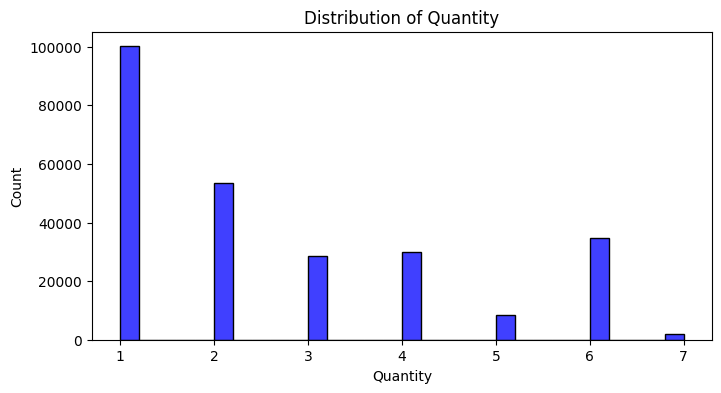

In [37]:
# Membuat histogram untuk Quantity
plt.figure(figsize=(8, 4))
sns.histplot(data_cleans['Quantity'], color='blue', bins=30)

plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.show()


Berdasarkan pengamatan histogram, distribusi data tidak-lah normal. Skewness adalah ukuran asimetri distribusi data. Data tidak simetris atau data condong ke satu sisi. Untuk mengecek seberapa condong distribusinya maka dapat dilakukan pengukuran melalui metode ini :

In [43]:
skewness_value = skew(data_cleans['Quantity'])
print("Skewness:", skewness_value)

Skewness: 0.8345409194955508


Jika skewness lebih dari 0, seperti dalam kasus ini (0.8345409194955508), itu menunjukkan bahwa distribusi data cenderung miring ke kanan. Artinya, ekor distribusi lebih panjang di sebelah kanan, dan sebagian besar nilai cenderung berada di sebelah kiri. kemiringan seperti ini juga disebut dengan positif Skew.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


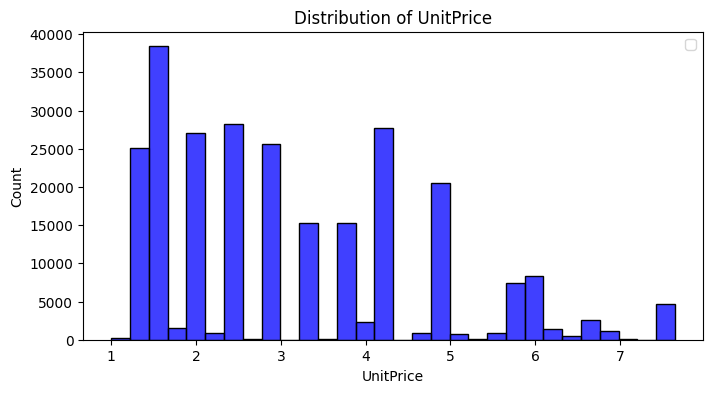

In [41]:
# Membuat histogram dan kurva kepadatan kernel
plt.figure(figsize=(8, 4))
sns.histplot(data_cleans['UnitPrice'], color='blue', bins=30)

plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.legend()

plt.show()


In [44]:
skewness_value = skew(data_cleans['UnitPrice'])
print("Skewness:", skewness_value)

Skewness: 0.7669525861352192


Untuk pengecekan UnitPrice juga sama, memiliki skewness dengan nilai 0.76 yang menandakan bahwa distribusi datanya dapat dikategorikan Positif skew.


Untuk memberikan panduan umum, kita dapat menggunakan aturan praktis berikut untuk menginterpretasikan apakah suatu nilai skewness dapat dianggap sebagai positif (miring ke kanan) atau negatif (miring ke kiri):

Skewness Positif:

Jika nilai skewness lebih besar dari 0, namun kurang dari 1, dapat dianggap sebagai skewness positif yang sedang.
Jika nilai skewness lebih dari 1, dapat dianggap sebagai skewness positif yang tinggi.
Skewness Negatif:

Jika nilai skewness lebih kecil dari 0, namun lebih besar dari -1, dapat dianggap sebagai skewness negatif yang sedang.
Jika nilai skewness kurang dari -1, dapat dianggap sebagai skewness negatif yang tinggi.